In [8]:
from typing import List, TypedDict
from langgraph.graph import StateGraph
import math

In [9]:
class AgentState(TypedDict):
    name:str
    values:List[int]
    operation:str
    result:str

def process_node(state: AgentState) -> AgentState:
    if state['operation'] == "+":
        number_result = sum(state['values'])
    else:
        number_result = math.prod(state['values'])

    state['result'] = f"Hi {state['name']}, the result is {number_result}"
    return state

In [10]:
graph = StateGraph(AgentState)

graph.add_node("process_node", process_node)

graph.set_entry_point("process_node")
graph.set_finish_point("process_node")

app = graph.compile()

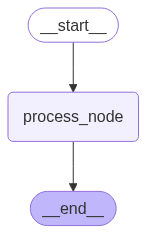

In [11]:
from IPython.display import Image,display

display(Image(app.get_graph().draw_mermaid_png()))


In [14]:
answers = app.invoke({"name": "Jack Sparrow","values": [1,2,3,4] , "operation": "+"})

answers['result']

'Hi Jack Sparrow, the result is 10'